In [1]:
import  pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import torch
from torch import nn
from torch.utils.data import Dataset,DataLoader
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("C:\\Users\EDGAR MUYALE DAVIES\\Downloads\\final.csv")
df.head()

,teamIdHome,teamIdAway,home_team_position,away_team_position,matchweek,homeGF,homeGA,awayGF,awayGA,homeLast1,...,homeLast4,homeLast5,awayLast1,awayLast2,awayLast3,awayLast4,awayLast5,homeScore,awayScore,o35
0,9,3,19.0,2.0,12.0,15,11,24,19,0.5,...,0.5,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
1,6,17,18.0,16.0,12.0,19,18,22,20,0.0,...,0.0,0.5,0.5,1.0,0.5,0.0,0.0,1.0,0.0,0.0
2,11,16,13.0,15.0,12.0,14,19,11,20,0.0,...,0.0,1.0,0.0,0.5,0.0,0.0,1.0,2.0,2.0,1.0
3,8,5,17.0,7.0,12.0,12,15,15,13,0.5,...,0.0,0.0,0.5,1.0,0.5,1.0,0.5,1.0,0.0,0.0
4,20,4,10.0,8.0,12.0,18,13,17,10,1.0,...,1.0,0.0,0.0,0.5,0.5,1.0,1.0,1.0,2.0,0.0


In [4]:
def frequency(column,df=df):
    print('The most frequent items are:')
    print(df[column].value_counts().head(10))
    print('The least frequent elements are:')
    print(df[column].value_counts().tail(10))

In [6]:
for column in df.columns:
    frequency(column=column)

The most frequent items are:
14    334
8     331
5     330
9     329
12    328
3     328
13    327
6     327
20    327
11    327
Name: teamIdHome, dtype: int64
The least frequent elements are:
15    325
10    324
1     323
17    323
16    323
19    322
4     322
2     321
7     320
18    319
Name: teamIdHome, dtype: int64
The most frequent items are:
18    332
7     331
2     330
19    329
4     329
16    328
1     328
17    328
10    327
15    326
Name: teamIdAway, dtype: int64
The least frequent elements are:
20    324
11    324
13    324
6     324
12    323
3     323
9     322
5     321
8     320
14    317
Name: teamIdAway, dtype: int64
The most frequent items are:
17.0    341
9.0     341
13.0    330
4.0     329
20.0    328
18.0    328
2.0     326
7.0     326
12.0    326
14.0    325
Name: home_team_position, dtype: int64
The least frequent elements are:
1.0     325
11.0    320
15.0    320
8.0     320
6.0     319
16.0    318
5.0     316
10.0    315
3.0     313
19.0    313
Name: home_

In [37]:
feature_list = ['teamIdHome', 'teamIdAway', 'home_team_position', 'away_team_position', 'matchweek', 'homeGF', 'homeGA', 'awayGF', 'awayGA', 'homeLast1','homeLast2', 'homeLast3', 'homeLast4', 'homeLast5', 'awayLast1', 'awayLast2', 'awayLast3', 'awayLast4', 'awayLast5', 'homeScore', 'awayScore']


Text(0.5, 1.0, 'Homelast1 vs Away last4')

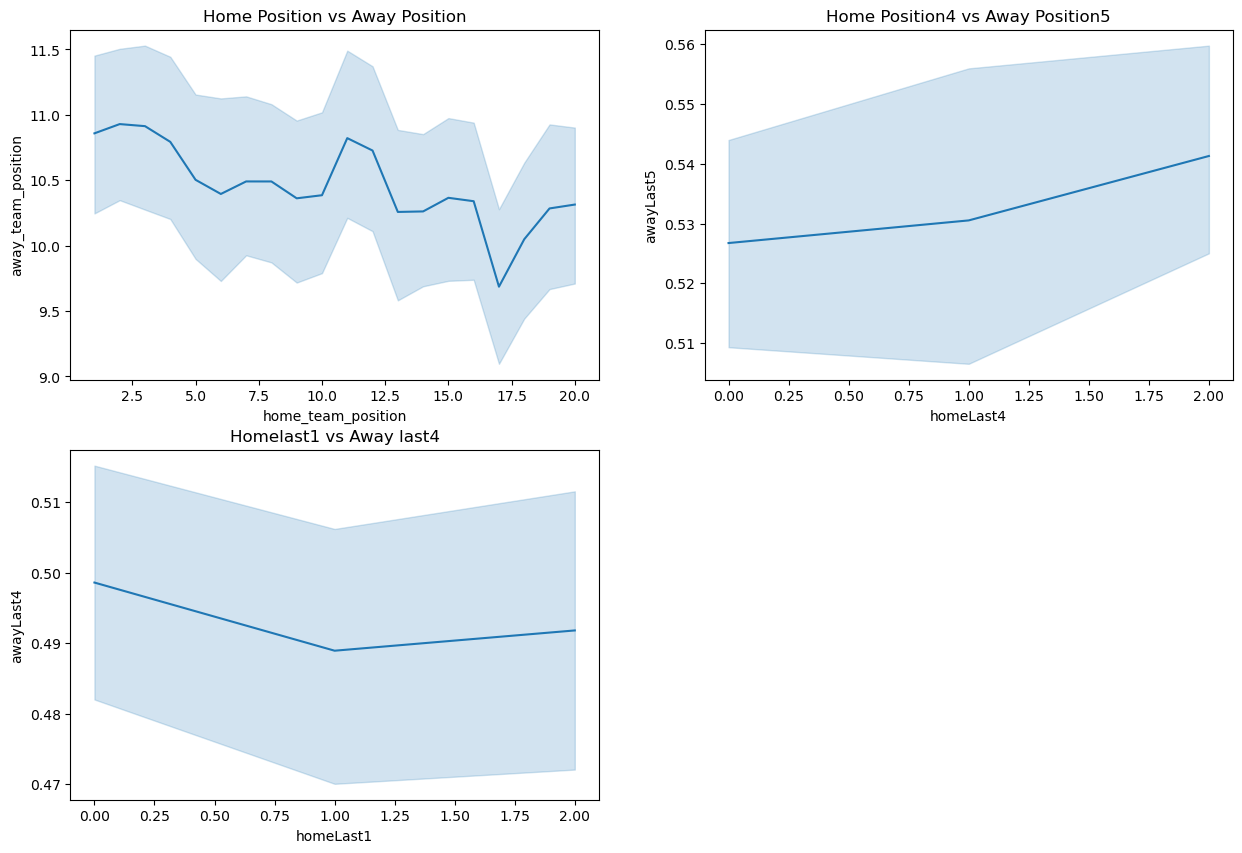

In [44]:
fig = plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.lineplot(x='home_team_position',y='away_team_position',data=df)
plt.title('Home Position vs Away Position')
plt.subplot(2,2,2)
sns.lineplot(x='homeLast4',y='awayLast5',data=df)
plt.title('Home Position4 vs Away Position5')
plt.subplot(2,2,3)
sns.lineplot(x='homeLast1',y='awayLast4',data=df)
plt.title('Homelast1 vs Away last4')

In [ ]:

X = df.drop(['o35'],axis=1).to_numpy()
y = df['o35'].to_numpy()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train = torch.from_numpy(X_train).type(torch.float32)
X_test = torch.from_numpy(X_test).type(torch.float32)
y_train = torch.from_numpy(y_train).type(torch.float32)
y_test = torch.from_numpy(y_test).type(torch.float32)




In [ ]:
# Creating a Deep Learning Model using nn.Linear and then using DataLoader to train the model in batches
class MatchPredictor(nn.Module):
    def __init__(self,in_features,out_features,hidden_features):
        super().__init__()
        self.linear_layer = nn.Sequential(nn.Linear(in_features=in_features,out_features=hidden_features),
                                          nn.ReLU(),
                                          nn.Linear(in_features=hidden_features,out_features=out_features))

    def forward(self,x:torch.Tensor):
        x=torch.sigmoid(self.linear_layer(x))
        return x



class Data(Dataset):
    def __init__(self):
        self.X = X_train
        self.y = y_train
        self.len = self.X.shape[0]
    def __getitem__(self, index):
        return self.X[index],self.y[index]
    def __len__(self):
        return self.len
print(X.shape)
print(y.shape)

model = MatchPredictor(in_features=21,hidden_features=200,out_features=2)
data_set = Data()
train_loader = DataLoader(dataset=data_set,batch_size=64)
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.01)
loss_function = nn.CrossEntropyLoss()
torch.manual_seed(42)
epochs = 200
"

In [ ]:
for epoch in range (epochs):
    for x,y in train_loader:
        optimizer.zero_grad()
        z =model(X_train)
        loss = loss_function(z,y_train)
        loss.backwards()
        optimizer.step()
        with torch.inference_mode():
            model.eval()
            z = model(X_test)
            test_loss=loss_function(z,y_test)
            print(f"Epoch{epoch}|loss{loss}|test loss{test_loss}")
with torch.inference_mode():
    torch.manual_seed(42)
    print(torch.round(model(X_test)))





In [ ]:
predicted_results  = {tensor([[0., 1.],
        [0., 1.],
        [0., 1.],
        ...,
        [1., 1.],
        [0., 1.],
        [0., 1.]])}